In [1]:
from google.colab import drive
drive.mount("/content/drive")

#to confirm gpu access
import tensorflow as tf
device_name=tf.test.gpu_device_name()
print(device_name)

Mounted at /content/drive



In [ ]:
!git clone "https://github.com/sydney-machine-learning/sentimentanalysis-Bible.git"

In [2]:
!pip3 install afinn
from afinn import Afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.2 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=b6224c400f254303935f116c1c08eb0efbb8f3d675a6a5a1e922e4ee686b8147
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


In [3]:
import os

In [14]:
!ls

 afinn-bsi_ch5.png	     'New Revised Standard Version'
 afinn-bsi.png		      README.md
 Chapter-5_furnished.txt      Results
 Chapter-6_furnished.txt      Sermon_On_Mount_Sentiment_Analysis.ipynb
 Chapter-7_furnished.txt      Steps.txt
'King James Version'	      text_cleaning.py
'New International Version'


In [12]:
os.chdir("drive/MyDrive/sentimentanalysis-Bible-main")

In [13]:
afinn = Afinn(language='en')

In [ ]:
pos_index = []
neg_index = []
neutral_index = []
most_pos = []

In [ ]:
chapters = ["Chapter-5_cleaned", "Chapter-6_cleaned", "Chapter-7_cleaned"]
for i in range(3):
  chapter = open('New Revised Standard Version/'+ chapters[i] + '.txt')
  data = chapter.read()
  sentences = data.split('.')
  print(data)
  pos = 0
  neg = 0
  neutral = 0

  for sentence in sentences:
    score = int(afinn.score(sentence))

    if score>0:
      pos+=1
    elif score<0:
      neg+=1
    else:
      neutral+=1
  scored_sentences = ((afinn.score(sent), sent) for sent in sentences)
  sorted_sentences = sorted(scored_sentences)
  n = len(sentences)
  pos_index.append(pos/n)
  neg_index.append(neg/n)
  neutral_index.append(neutral/n)
  most_pos.append(sorted_sentences)

In [ ]:
neg_index

[0.32558139534883723, 0.18181818181818182, 0.13636363636363635]

In [ ]:
neutral_index

[0.2558139534883721, 0.21212121212121213, 0.6363636363636364]

In [ ]:
most_pos

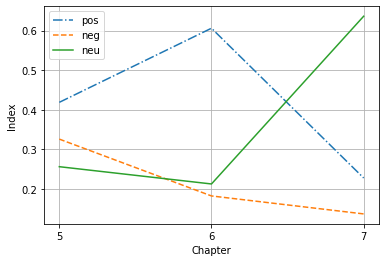

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X = np.arange(5,8)
plt.plot(X,pos_index,'-.',label='pos')
plt.plot(X,neg_index, '--',label='neg')
plt.plot(X,neutral_index,'-',label='neu')
plt.legend()
plt.xticks(X)
plt.xlabel('Chapter')
plt.ylabel('Index')
plt.grid()
plt.savefig('afinn-bsi.png')
plt.show()  

In [17]:
##imports
!pip install torch
import torch
import pandas as pd
# !pip install onnx
# import onnx
# !pip install onnx-tf
# from onnx_tf.backend import prepare

!pip install transformers==4.10

import transformers
from transformers import BertTokenizer, BertModel, BertConfig

import pandas as pd

import spacy
# spacy_en = spacy.load('en')
import re

from torch.utils.data import DataLoader

import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 4.8 MB/s 
     |████████████████████████████████| 596 kB 43.3 MB/s 
     |████████████████████████████████| 3.3 MB 51.4 MB/s 
     |████████████████████████████████| 101 kB 10.4 MB/s 
     |████████████████████████████████| 880 kB 60.7 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=604298de33d28333b08de2aa5e659af0671b7f66550aea5e92048ee3cae8d244
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [18]:
PATH = "/content/drive/MyDrive/bertmodel.pth"

In [19]:
from google.colab import drive
drive.mount('/content/drive')
!pip freeze --local > /content/drive/My\ Drive/colab_installed.txt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
class BERT(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.layer2 = torch.nn.Dropout(0.3)
        self.layer3 = torch.nn.Linear(768, 11)

    def forward(self, ids, mask, token_type_ids, return_dict = False):
        unw, out_1 = self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[0], self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[1]
        out_2 = self.layer2(out_1)
        out_final = self.layer3(out_2)
        return out_final

model = BERT()
model

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERT(
  (layer1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
     

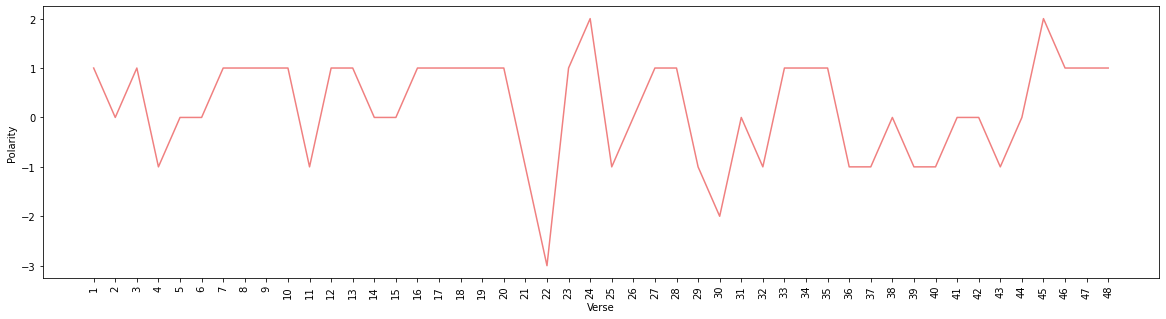

In [39]:
#verse by verse polarity for chapter 5
chapter5 = pd.read_csv("New International Version/Chapter-5_cleaned.csv")
ch5scores=[]
ch5_verses=chapter5['verse']
for i in range(len(ch5_verses)):
  verse = ch5_verses[i]
  sentences = verse.split('.')
  #print(verse)
  pos = 0
  for sentence in sentences:
    score = int(afinn.score(sentence))

    if score>0:
      pos+=1
    elif score<0:
      pos-=1
  ch5scores.append(pos)
import matplotlib.pyplot as plt
import numpy as np
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
n=len(ch5scores)
X = np.arange(1,n+1)
plt.plot(X,ch5scores,'-',label='',color='lightcoral')

plt.xticks(X,rotation=90)
plt.xlabel('Verse')
plt.ylabel('Polarity')


plt.savefig('verse_polatity_ch5.png')
plt.show()  

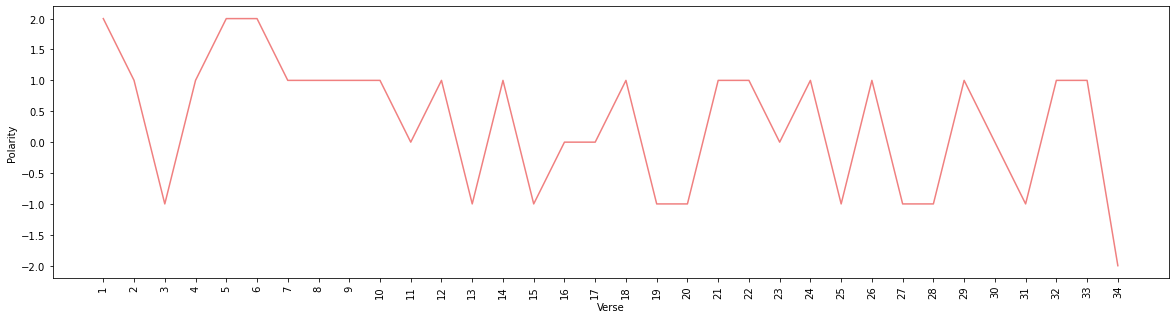

In [44]:
#verse by verse polarity for chapter 6
chapter6 = pd.read_csv("New International Version/Chapter-6_cleaned.csv")
ch6scores=[]
ch6_verses=chapter6['verse']
for i in range(len(ch6_verses)):
  verse = ch6_verses[i]
  sentences = verse.split('.')
  #print(verse)
  pos = 0
  for sentence in sentences:
    score = int(afinn.score(sentence))

    if score>0:
      pos+=1
    elif score<0:
      pos-=1
  ch6scores.append(pos)
import matplotlib.pyplot as plt
import numpy as np
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
n=len(ch6scores)
X = np.arange(1,n+1)
plt.plot(X,ch6scores,'-',label='',color='lightcoral')

plt.xticks(X,rotation=90)
plt.xlabel('Verse')
plt.ylabel('Polarity')


plt.savefig('verse_polatity_ch6.png')
plt.show()  

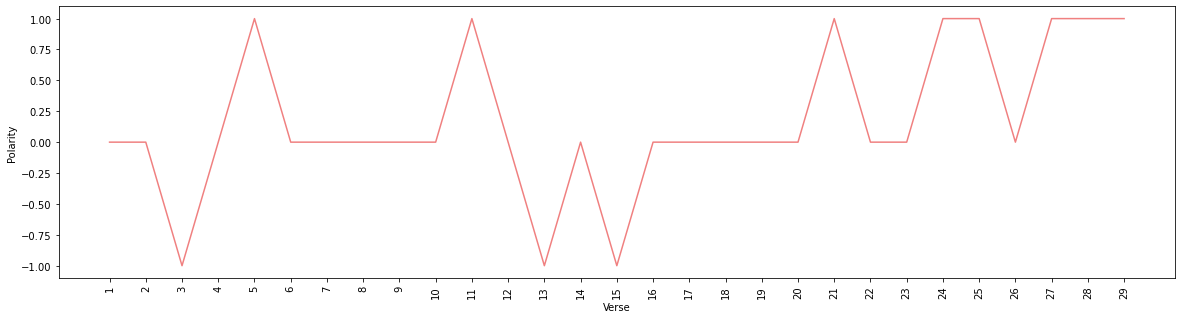

In [43]:
#verse by verse polarity for chapter 7
chapter7 = pd.read_csv("New International Version/Chapter-7_cleaned.csv")
ch7scores=[]
ch7_verses=chapter7['verse']
for i in range(len(ch7_verses)):
  verse = ch7_verses[i]
  sentences = verse.split('.')
  #print(verse)
  pos = 0
  for sentence in sentences:
    score = int(afinn.score(sentence))

    if score>0:
      pos+=1
    elif score<0:
      pos-=1
  ch7scores.append(pos)
import matplotlib.pyplot as plt
import numpy as np
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(5)
n=len(ch7scores)
X = np.arange(1,n+1)
plt.plot(X,ch7scores,'-',label='',color='lightcoral')

plt.xticks(X,rotation=90)
plt.xlabel('Verse')
plt.ylabel('Polarity')


plt.savefig('verse_polatity_ch7.png')
plt.show()  